In [1]:
from src.neural_networks.get_data import get_tf_data, stack_1d_features, normalize_1d_features_with_mean_std, load_cv_data
from src.neural_networks.nn_forecast import NNForecast
from src.visualization.twcrpss_plot import make_twcrpss_plot_tf
from src.visualization.brier_score import make_brier_skill_plot_tf
from src.visualization.pit import make_cpit_diagram_tf, comp_multiple_pit_scores
from src.visualization.reliability_diagram import make_reliability_and_sharpness_tf
from src.training.training import load_model
from src.visualization.plot_forecasts import plot_forecast_pdf_tf
from src.climatology.climatology import Climatology
from src.visualization.brier_score import get_brier_scores_tf


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


2024-05-24 09:18:44.583849: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-24 09:18:44.586307: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-24 09:18:44.617460: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-24 09:18:50.641596: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

features_names = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

features_names_dict = {name: 1 for name in features_names}

features_names_dict['wind_speed'] = 15

ignore = ['229', '285', '323']



In [3]:

train_data, test_data, data_info = load_cv_data(3, features_names_dict)

train_data = train_data.shuffle(len(train_data))

train_data = train_data.batch(32)

train_data = train_data.prefetch(tf.data.experimental.AUTOTUNE)


In [4]:
test_data_original = test_data

In [5]:
test_data = test_data.batch(len(test_data))

test_data = test_data.repeat()

test_data = test_data.prefetch(tf.data.experimental.AUTOTUNE)

In [6]:
folder = '/net/pc200239/nobackup/users/hakvoort/models/climatology/climatology_cv_3'

climatology = Climatology.load(folder)

In [7]:

filepath = '/net/pc200239/nobackup/users/hakvoort/models/conv_nn/'

crps_tn_e10 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_10', train_data)

crps_tn_e10_2 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_10_v2', train_data)

crps_tn_e10_3 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_10_v3', train_data)

crps_tn_e10_4 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_10_v4', train_data)



crps_tn_e50 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_50', train_data)

hist_crps_e50 = NNForecast.load_history(filepath + 'CRPS_trunc_normal_epochs_50')

crps_tn_e50_2 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_50_v2', train_data)

hist_crps_e50_2 = NNForecast.load_history(filepath + 'CRPS_trunc_normal_epochs_50_v2')

crps_tn_e50_3 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_50_v3', train_data)

hist_crps_e50_3 = NNForecast.load_history(filepath + 'CRPS_trunc_normal_epochs_50_v3')

crps_tn_e50_4 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_50_v4', train_data)

hist_crps_e50_4 = NNForecast.load_history(filepath + 'CRPS_trunc_normal_epochs_50_v4')



crps_tn_e30 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_30', train_data)

crps_tn_e30_2 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_30_v2', train_data)

crps_tn_e30_3 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_30_v3', train_data)

crps_m_e20 = NNForecast.my_load(filepath + 'CRPS_mixture_epochs_20', train_data)

crps_m_e20_2 = NNForecast.my_load(filepath + 'CRPS_mixture_epochs_20_v2', train_data)

crps_m_e30 = NNForecast.my_load(filepath + 'CRPS_mixture_epochs_30', train_data)

twCRPS_M11_STD2_C20_e15 = NNForecast.my_load(filepath + 'twCRPS_mean_11_std_2_constant_0.2_trunc_normal_epochs_15', train_data)

twCRPS_M11_STD02_C05_e15 = NNForecast.my_load(filepath + 'twCRPS_mean_11_std_0.2_constant_0.5_trunc_normal_epochs_15', train_data)

twCRPS_M9_STD2_C20_e15 = NNForecast.my_load(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_15', train_data)

twCRPS_M9_STD2_C20_e15_2 = NNForecast.my_load(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_15_v2', train_data)

crps_tn_e15 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_15', train_data)

crps_tn_e15_2 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_15_v2', train_data)



twCRPS_M9_STD2_C20_e50 = NNForecast.my_load(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_50', train_data)

hist_e50_twCRPS_M9_STD2_C20 = NNForecast.load_history(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_50')

twCRPS_M9_STD2_C20_e50_2 = NNForecast.my_load(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_50_v2', train_data)

hist_e50_twCRPS_M9_STD2_C20_2 = NNForecast.load_history(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_50_v2')

twCRPS_M9_STD2_C20_e50_3 = NNForecast.my_load(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_50_v3', train_data)

hist_e50_twCRPS_M9_STD2_C20_3 = NNForecast.load_history(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_50_v3')

twCRPS_M9_STD2_C20_e50_4 = NNForecast.my_load(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_50_v4', train_data)

hist_e50_twCRPS_M9_STD2_C20_4 = NNForecast.load_history(filepath + 'twCRPS_mean_9_std_2_constant_0.2_trunc_normal_epochs_50_v4')


twCRPS_M10_STD1_C10_e50 = NNForecast.my_load(filepath + 'twCRPS_mean_10_std_1_constant_0.1_trunc_normal_epochs_50', train_data)

hist_e50_twCRPS_M10_STD1_C10 = NNForecast.load_history(filepath + 'twCRPS_mean_10_std_1_constant_0.1_trunc_normal_epochs_50')

twCRPS_M10_STD1_C10_e50_2 = NNForecast.my_load(filepath + 'twCRPS_mean_10_std_1_constant_0.1_trunc_normal_epochs_50_v2', train_data)

hist_e50_twCRPS_M10_STD1_C10_2 = NNForecast.load_history(filepath + 'twCRPS_mean_10_std_1_constant_0.1_trunc_normal_epochs_50_v2')

twCRPS_M10_STD1_C10_e50_3 = NNForecast.my_load(filepath + 'twCRPS_mean_10_std_1_constant_0.1_trunc_normal_epochs_50_v3', train_data)

hist_e50_twCRPS_M10_STD1_C10_3 = NNForecast.load_history(filepath + 'twCRPS_mean_10_std_1_constant_0.1_trunc_normal_epochs_50_v3')

twCRPS_M10_STD1_C10_e50_4 = NNForecast.my_load(filepath + 'twCRPS_mean_10_std_1_constant_0.1_trunc_normal_epochs_50_v4', train_data)

hist_e50_twCRPS_M10_STD1_C10_4 = NNForecast.load_history(filepath + 'twCRPS_mean_10_std_1_constant_0.1_trunc_normal_epochs_50_v4')


best_model = crps_tn_e10_4


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step


/usr/people/hakvoort/.local/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 142 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966ms/step


/usr/people/hakvoort/.local/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 154 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [8]:
hist_e150_twCRPS_M10_STD1_C10 = NNForecast.load_history(filepath + 'twCRPS_mean_10_std_1_constant_0.1_trunc_normal_epochs_150')

hist_e150_twCRPS_M10_STD1_C10_2 = NNForecast.load_history(filepath + 'twCRPS_mean_10_std_1_constant_0.1_trunc_normal_epochs_150_v2')

e150_list = [hist_e150_twCRPS_M10_STD1_C10, hist_e150_twCRPS_M10_STD1_C10_2]


In [9]:
hists_crps = [hist_crps_e50, hist_crps_e50_2, hist_crps_e50_3, hist_crps_e50_4]

hists_twcrps = [hist_e50_twCRPS_M9_STD2_C20, hist_e50_twCRPS_M9_STD2_C20_2, hist_e50_twCRPS_M9_STD2_C20_3, hist_e50_twCRPS_M9_STD2_C20_4]

hists_twcrps_2 = [hist_e50_twCRPS_M10_STD1_C10, hist_e50_twCRPS_M10_STD1_C10_2, hist_e50_twCRPS_M10_STD1_C10_3, hist_e50_twCRPS_M10_STD1_C10_4]

In [10]:
nn_crps_e10_models = {'CRPS_trunc_normal_epochs_10_v1': crps_tn_e10,
                      'CRPS_trunc_normal_epochs_10_v2': crps_tn_e10_2,
                      'CRPS_trunc_normal_epochs_10_v3': crps_tn_e10_3,
                      'CRPS_trunc_normal_epochs_10_v4': crps_tn_e10_4}

nn_crps_e30_models = {'CRPS_trunc_normal_epochs_30': crps_tn_e30,
                        'CRPS_trunc_normal_epochs_30_v2': crps_tn_e30_2,
                        'CRPS_trunc_normal_epochs_30_v3': crps_tn_e30_3}

nn_crps_m_e20_models = {'CRPS_mixture_epochs_20': crps_m_e20,
                        'CRPS_mixture_epochs_20_v2': crps_m_e20_2,
                        'CRPS_mixture_epochs_30': crps_m_e30}

nn_twcrps_models = {'twCRPS_M11_STD2_C20_e15': twCRPS_M11_STD2_C20_e15,
                    'twCRPS_M11_STD02_C05_e15': twCRPS_M11_STD02_C05_e15}

nn_e15_models = {'crps_tn_e15': crps_tn_e15,
                    'crps_tn_e15_2': crps_tn_e15_2,
                    'twCRPS_M9_STD2_C20_e15': twCRPS_M9_STD2_C20_e15,
                    'twCRPS_M9_STD2_C20_e15_2': twCRPS_M9_STD2_C20_e15_2}

In [11]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/emos/batching/'

emos_base = load_model(filepath + 'crps_batch_none_epochs_600')

emos_batch_32_epochs_50 = load_model(filepath + 'crps_batch_32_epochs_50')

emos_batch_32_epochs_150 = load_model(filepath + 'crps_batch_32_epochs_150')


test_file_path = '/net/pc200239/nobackup/users/hakvoort/models/emos/pit_loss/test'

emos_pit_loss = load_model(test_file_path)

test_file_path2 = '/net/pc200239/nobackup/users/hakvoort/models/emos/pit_loss/test_multiple_of_5'

emos_pit_loss_multiple_of_5 = load_model(test_file_path2)



Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution


In [12]:
emos_pit_loss_dict = {'cPIT_loss_all': emos_pit_loss,
                      'cPIT_loss_multiple_of_5': emos_pit_loss_multiple_of_5}

emos_dict = {'base': emos_base}

In [13]:
for model_name, model in nn_crps_e10_models.items():
    print("CRPS for model: ", model_name, ' is: ', model.CRPS(test_data, 10000).numpy())

for model_name, model in nn_crps_e10_models.items():
    print("twCRPS12 for model: ", model_name, ' is: ', model.twCRPS(test_data, [12], 10000)[0].numpy())

244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
CRPS for model:  CRPS_trunc_normal_epochs_10_v1  is:  0.8373994
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
CRPS for model:  CRPS_trunc_normal_epochs_10_v2  is:  0.84486413
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
CRPS for model:  CRPS_trunc_normal_epochs_10_v3  is:  0.85350597
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
CRPS for model:  CRPS_trunc_normal_epochs_10_v4  is:  0.83086467
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
twCRPS12 for model:  CRPS_trunc_normal_epochs_10_v1  is:  0.061050765
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
twCRPS12 for model:  CRPS_trunc_normal_epochs_10_v2  is:  0.061165616
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
twCRPS12 for model:  CRPS_trunc_normal_epochs_10_v3  is:  0.060563788
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
twCRPS12 for model:  CRPS_trunc_normal_epochs_10_v4  is:  0.05928719


## Work of the past 4 weeks

- Implemented (convolutional) neural networks, which can be trained on the CRPS/twCRPS and with different parametric distributions.

- Implemented batching efficiently for EMOS with linear regression.

- Implemented the PIT scores.

- For EMOS with linear regression, added the option to train on PIT scores (to get a better understanding of the behavior).

- Looked into different ways of hyperparameter optimization.



## Convolutional neural networks

In the following plots we can see CNNs, where I fixed the network architecture for all models, except for the number of epochs, the distribution and the loss function. As reference model the EMOS with linear regression with CRPS and truncated normal is chosen.

Currently use random initialization, and since overfitting is a problem (even when incorporating $l_2$ regression) we use early stopping. This leads to varied results over different runs. Following plots contain 4 different models with the exact same settings.

For the architecture, I will send a picture.

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


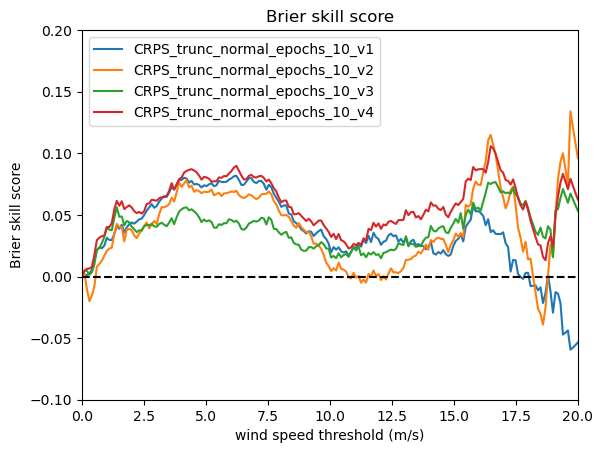

In [19]:
values = np.linspace(0, 20, 200)
ylim = [-0.1, 0.2]
#ylim = [-0.2, 1]
make_brier_skill_plot_tf(emos_base, nn_crps_e10_models, test_data, values, ylim=ylim)

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


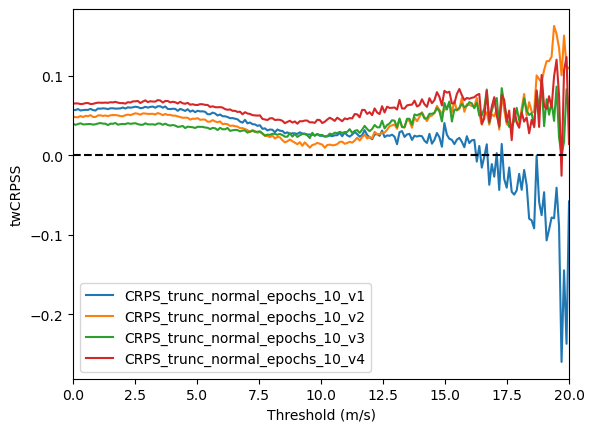

In [20]:
make_twcrpss_plot_tf(emos_base, nn_crps_e10_models, test_data, values)

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


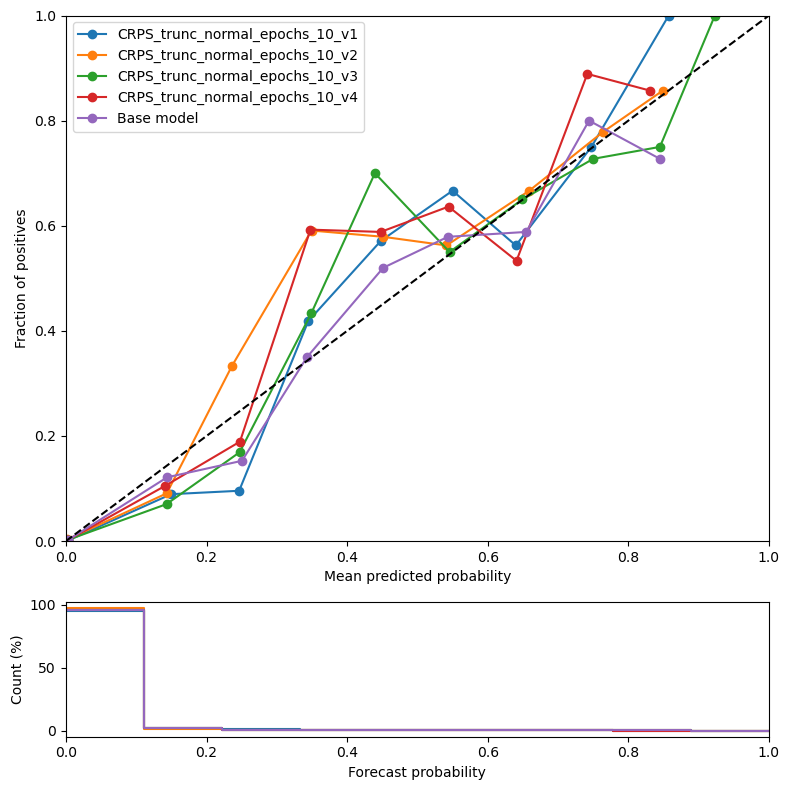

In [22]:
t = 15
make_reliability_and_sharpness_tf(nn_crps_e10_models, test_data, t=t, base_model=emos_base)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


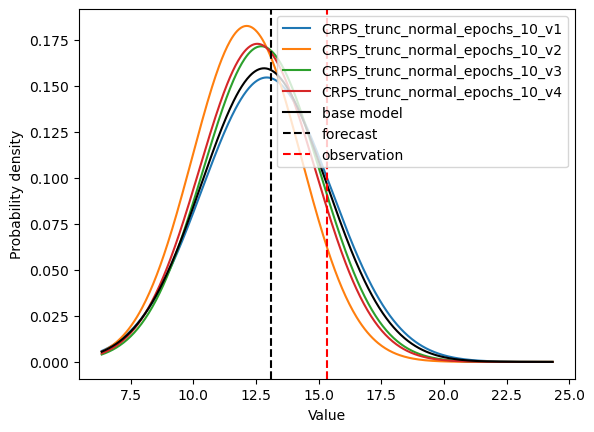

In [23]:
t = 15
plot_forecast_pdf_tf(nn_crps_e10_models, test_data_original, observation_value=t, base_model=emos_base, plot_size = 9)

By looking at the twCRPSS and BSS plots, we can see that v4 is the 'best' model. This is unfortanetely not reflected in the cPIT diagram for high thresholds, then model v2 has the best performance.

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
There are 848 values in the PIT diagram


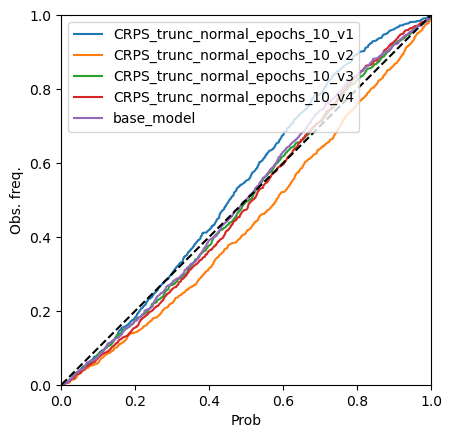

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
The pit score for model CRPS_trunc_normal_epochs_10_v1 is: 0.04453717917203903
The pit score for model CRPS_trunc_normal_epochs_10_v2 is: 0.056648969650268555
The pit score for model CRPS_trunc_normal_epochs_10_v3 is: 0.01818939484655857
The pit score for model CRPS_trunc_normal_epochs_10_v4 is: 0.02609872631728649
The pit score for model base_model is: 0.02159336768090725


In [25]:
t = 10
make_cpit_diagram_tf(nn_crps_e10_models, test_data_original, t=t, base_model=emos_base)
pits_scores = comp_multiple_pit_scores(nn_crps_e10_models, test_data_original, t=t, base_model=emos_base)

for key, value in pits_scores.items():
    print("The pit score for model {} is: {}".format(key, value))

In the following plot I trained on on the twCRPS function. For higher mean and smaller std the results got worse, both for CRPS and twCRPS with high threshold.

244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


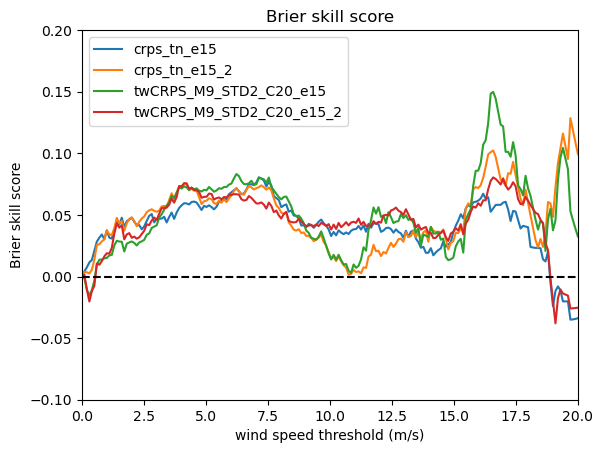

In [17]:
make_brier_skill_plot_tf(emos_base, nn_e15_models, test_data, values, ylim=ylim)

In this BSS plot I trained using a mixture distribution of TN-LN. The results were not better compared to only using TN. I increased the number of epochs during training, since convergence was slower with mixture distributions.

244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


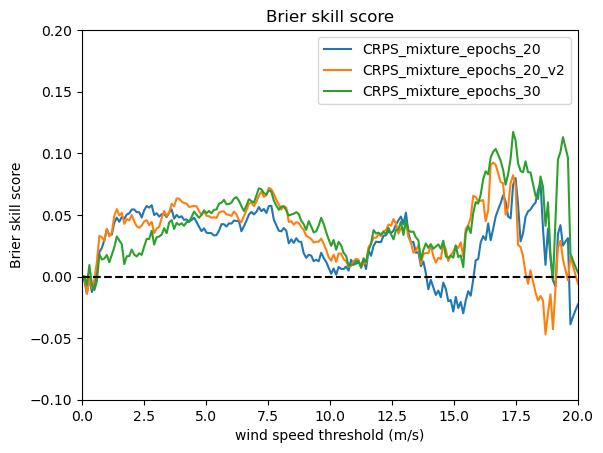

In [18]:
make_brier_skill_plot_tf(emos_base, nn_crps_m_e20_models, test_data, values, ylim=ylim)

And here a BSS plot with twCRPS with different constants.

244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


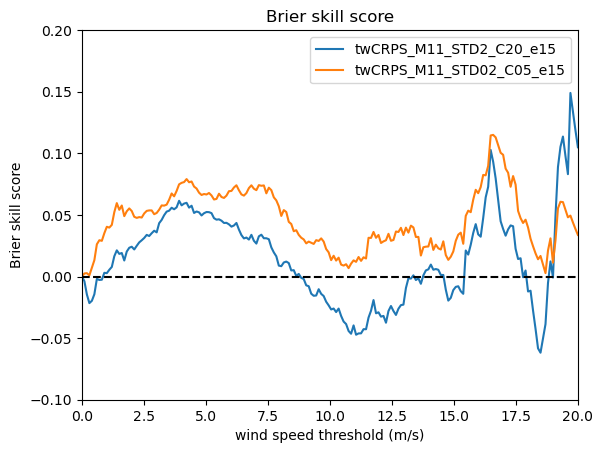

In [19]:
make_brier_skill_plot_tf(emos_base, nn_twcrps_models, test_data, values, ylim=ylim)

## Training and Validation Errors

In the following plots I compared the validation and training error for the models trained on the CRPS and twCRPS, one model has weight function with mean 9, std 2 and c 0.2, the other models are trained on a weight function with mean 10, std 1 and c 0.1 (so more weight for extremes). 

- Convergence of the CRPS is faster than for the twCRPS for both models.

- More emphasis on extremes results in slower convergence of CRPS.

/tmp/ipykernel_869478/116681875.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('Blues')
/tmp/ipykernel_869478/116681875.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('Reds')
/tmp/ipykernel_869478/116681875.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('Greens')


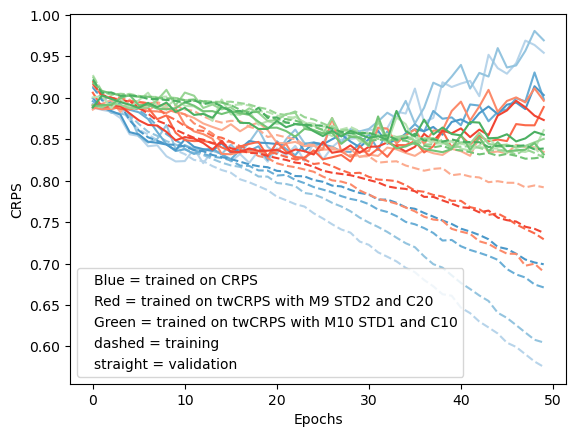

In [17]:
color_map = cm.get_cmap('Blues')
num_hists = len(hists_crps)

x_axis = np.arange(50)

for i, hist in enumerate(hists_crps):
    color = color_map(0.3 + i / num_hists * 0.4)  # Get a color from the color map.
    plt.plot(x_axis, hist['_loss_crps_sample'], label='CRPS_train', linestyle='--', color=color)
    plt.plot(x_axis, hist['val__loss_crps_sample'], label='CRPS_val', color=color)

color_map = cm.get_cmap('Reds')
num_hists = len(hists_twcrps)

for i, hist in enumerate(hists_twcrps):
    color = color_map(0.3 + i / num_hists * 0.4)  # Get a color from the color map.
    plt.plot(x_axis, hist['_loss_crps_sample'], label='CRPS_train', linestyle='--', color=color)
    plt.plot(x_axis, hist['val__loss_crps_sample'], label='CRPS_val', color=color)

color_map = cm.get_cmap('Greens')
num_hists = len(hists_twcrps_2)

for i, hist in enumerate(hists_twcrps_2):
    color = color_map(0.3 + i / num_hists * 0.4)  # Get a color from the color map.
    plt.plot(x_axis, hist['_loss_crps_sample'], label='CRPS_train', linestyle='--', color=color)
    plt.plot(x_axis, hist['val__loss_crps_sample'], label='CRPS_val', color=color)

plt.xlabel('Epochs')
plt.ylabel('CRPS')
plt.legend(['Blue = trained on CRPS', 'Red = trained on twCRPS with M9 STD2 and C20', 'Green = trained on twCRPS with M10 STD1 and C10', 'dashed = training', 'straight = validation'], handlelength=0)
plt.show()

/tmp/ipykernel_869478/1516196800.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('Blues')
/tmp/ipykernel_869478/1516196800.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('Reds')
/tmp/ipykernel_869478/1516196800.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('Greens')


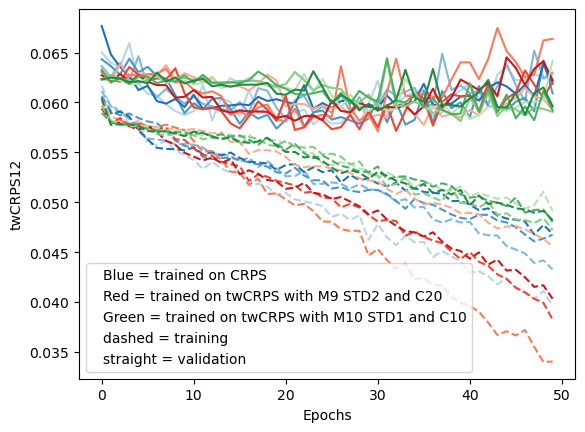

In [16]:
color_map = cm.get_cmap('Blues')
num_hists = len(hists_crps)

x_axis = np.arange(50)

for i, hist in enumerate(hists_crps):
    color = color_map(0.3 + i / num_hists * 0.6)  # Get a color from the color map.
    plt.plot(x_axis, hist['_tw_crps_12'], label='CRPS_train', linestyle='--', color=color)
    plt.plot(x_axis, hist['val__tw_crps_12'], label='CRPS_val', color=color)

color_map = cm.get_cmap('Reds')
num_hists = len(hists_twcrps)

for i, hist in enumerate(hists_twcrps):
    color = color_map(0.3 + i / num_hists * 0.6)  # Get a color from the color map.
    plt.plot(x_axis, hist['_tw_crps_12'], label='CRPS_train', linestyle='--', color=color)
    plt.plot(x_axis, hist['val__tw_crps_12'], label='CRPS_val', color=color)

color_map = cm.get_cmap('Greens')
num_hists = len(hists_twcrps_2)

for i, hist in enumerate(hists_twcrps_2):
    color = color_map(0.3 + i / num_hists * 0.6)  # Get a color from the color map.
    plt.plot(x_axis, hist['_tw_crps_12'], label='CRPS_train', linestyle='--', color=color)
    plt.plot(x_axis, hist['val__tw_crps_12'], label='CRPS_val', color=color)

plt.xlabel('Epochs')
plt.ylabel('twCRPS12')
plt.legend(['Blue = trained on CRPS', 'Red = trained on twCRPS with M9 STD2 and C20', 'Green = trained on twCRPS with M10 STD1 and C10', 'dashed = training', 'straight = validation'], handlelength=0)
plt.show()

/tmp/ipykernel_869478/1275423567.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('Blues')


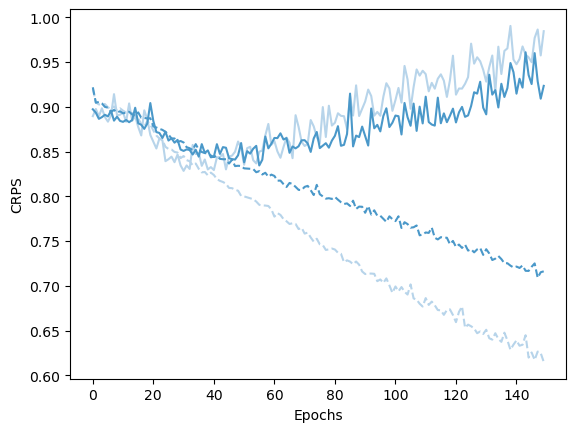

In [22]:

color_map = cm.get_cmap('Blues')
num_hists = len(e150_list)

x_axis = np.arange(150)

for i, hist in enumerate(e150_list):
    color = color_map(0.3 + i / num_hists * 0.6)  # Get a color from the color map.
    plt.plot(x_axis, hist['_loss_crps_sample'], label='CRPS_train', linestyle='--', color=color)
    plt.plot(x_axis, hist['val__loss_crps_sample'], label='CRPS_val', color=color)

plt.xlabel('Epochs')
plt.ylabel('CRPS')
#plt.legend(['Blue = trained on CRPS', 'Red = trained on twCRPS', 'dashed = training', 'straight = validation'], handlelength=0)
plt.show()


/tmp/ipykernel_869478/1169621644.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('Blues')


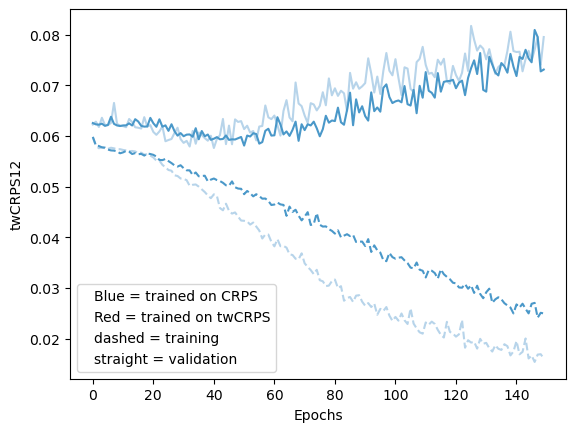

In [15]:


color_map = cm.get_cmap('Blues')
num_hists = len(e150_list)

x_axis = np.arange(150)

for i, hist in enumerate(e150_list):
    color = color_map(0.3 + i / num_hists * 0.6)  # Get a color from the color map.
    plt.plot(x_axis, hist['_tw_crps_12'], label='CRPS_train', linestyle='--', color=color)
    plt.plot(x_axis, hist['val__tw_crps_12'], label='CRPS_val', color=color)

plt.xlabel('Epochs')
plt.ylabel('twCRPS12')
plt.legend(['Blue = trained on CRPS', 'Red = trained on twCRPS', 'dashed = training', 'straight = validation'], handlelength=0)
plt.show()

## Research Question

My aim will be two answer the following question:

Can the use of weighted scoring rules and different parametric distributions in EMOS with linear regression or neural networks lead to better performance in forecasting extreme events? 

Need to determine which performance measure we will use.

Sjoerd said this would be good. He warned me to not keep trying stuff until somethinkg works.

## Training on cPIT Scores

Added the ability to train on cPIT scores, to get a better understanding of what it would look like to optimize using cPIT scores. The cPIT score is determined by integrating the area between optimal (the diagonal) and the actual cPIT diagram.
 I trained an EMOS model with linear regression. When I did it one PIT score this simply led to very bad results. Including a lot of cPIT scores resulted in slightly better models, but in terms of Brier score and CRPS they were still very bad. Two models will be shown:

- cPIT_loss_all: This model was trained by minimizing the average of cPIT scores with thresholds in $\{0,1,2,...,14,15\}$

- cPIT_loss_multiple_of_5: This model was trained by minimizing the average of cPIT scores with thresholds in $\{0,5,10,15\}$

Despite the extremely bad performance of the models, the cPIT diagrams still showed good performance. Also the reliability diagrams indicate good performance.

In [14]:
print("CRPS of base model: ", emos_base.CRPS(test_data, 10000).numpy())
print("CRPS cPIT_loss_all: ", emos_pit_loss.CRPS(test_data, 10000).numpy())
print("CRPS cPIT_loss_multiple_of_5: ", emos_pit_loss_multiple_of_5.CRPS(test_data, 10000).numpy())

CRPS of base model:  0.88841164
CRPS cPIT_loss_all:  1.1119112
CRPS cPIT_loss_multiple_of_5:  1.2785252


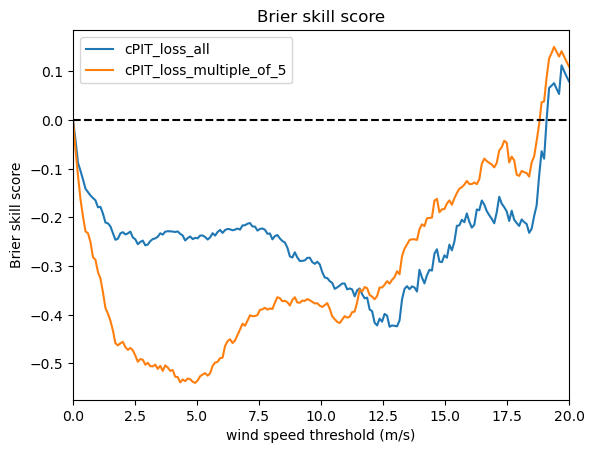

In [13]:
values = np.linspace(0, 20, 200)
make_brier_skill_plot_tf(emos_base, emos_pit_loss_dict, test_data, values)

There are 848 values in the PIT diagram


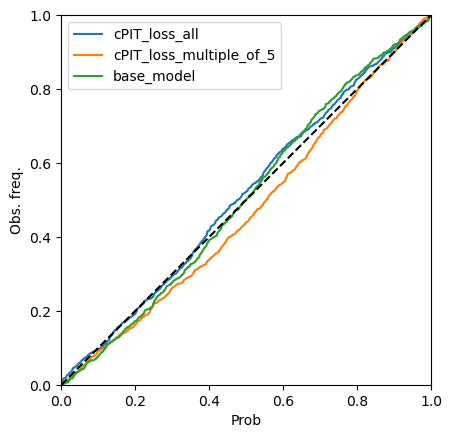

The pit score for model cPIT_loss_all is: 0.015123899094760418
The pit score for model cPIT_loss_multiple_of_5 is: 0.030547622591257095
The pit score for model base_model is: 0.02159336768090725


In [27]:
t = 10
make_cpit_diagram_tf(emos_pit_loss_dict, test_data_original, t=t, base_model=emos_base)

pits_scores = comp_multiple_pit_scores(emos_pit_loss_dict, test_data_original, t=t, base_model=emos_base)
for key, value in pits_scores.items():
    print("The pit score for model {} is: {}".format(key, value))

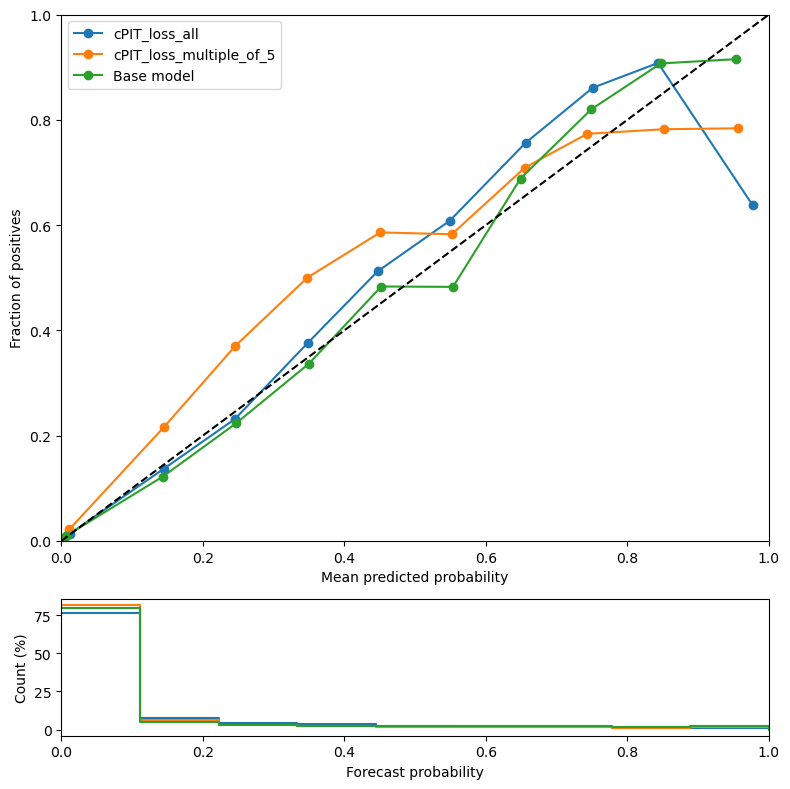

In [28]:
t = 10
make_reliability_and_sharpness_tf(emos_pit_loss_dict, test_data, t=t, base_model=emos_base)

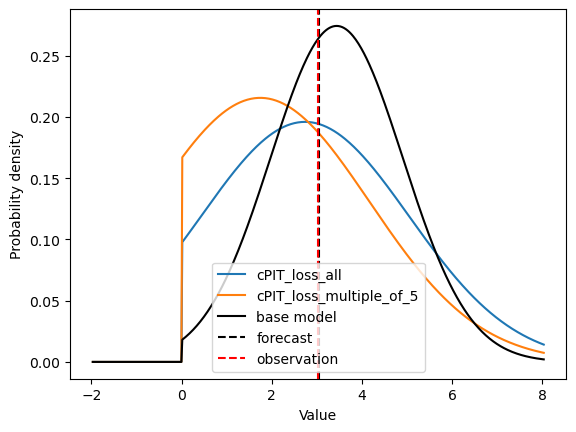

In [31]:
t = 0
plot_forecast_pdf_tf(emos_pit_loss_dict, test_data_original, observation_value=t, base_model=emos_base)

## Hyperparameter Optimization

My plan is the following, use Bayesian optimization to find the best CRPS and/or twCRPS model for the following parameters:

- For the twCRPS, the choice of $c \in [0, 2]$, $\mu \in [5, 15]$ and $\sigma \in [0.001, 5]$, for the weight function $$w(z) = c + \Phi_{\mu,\sigma}(z).$$  

- Forecast distribution, TN, LN or mixture of TN-LN.

- Number of epochs, between 1 and 50.

- Batch size, ${8, 16, 32, 64, 128, 256}$.

- Input grid size of the wind speed NWP forecast, $\{11, 16, 21, ..., 36\}$.

- Number of $7\times 7$ convolutional blocks.

- Number of $5\times 5$ convolutional blocks.

- Number of $3\times 3$ convolutional blocks.

- Number of dense layers, between 1 and 5.

- Number of units in each dense layer, between 10 and 200.

- Learning rate in the Adam optimizer.

- Value of $l_2$ regression.

### Scores

For the Bayesian optimization algorithm we need to determine which metric it tries to optimize. Current options:

- cPIT scores

- CRPS

- twCRPS with indicator function

- Brier score for specific thresholds

- Linear combination of the above

For the cPIT, twCRPS and Brier score we need to determine which thresholds are interesting. I think that 12 is a good candidate, since it corresponds to the 95'th quantile of the data. Lower would not correspond well to extremes, while any higher would result in very few data points.

I don't know whether optimizing using cPIT scores is the best approach.

Sjoerd wants to know how important performance on lower windspeeds is. Range of 0-8 m/s is not that important? 

As for the Bayesian optimization method, I read that Tree-Structured Parzen Estimator (TPE) might be a good choice, since these can handle categorical choices better than a Gaussian process.

Important choice is still which scoring measure to use. Linear combination does not have my preference, since this makes it hard to explain how to linear combination is chosen. Another way would be to use multi-objective TPE, which tries to find the pareto front of the objectives.

I plan to use three fold cross validation during the hyperparameter selection. Unfortanately there is still quite large variability between different runs. One way to fix this is to train every model multiple times, but this would lead to longer training times.



## Possible plan moving forward

Experiment with using (MO)TPE (first on EMOS with linear regression). If this works as expected, I will use this and otherwise I will rely on using a linear combination of CRPS and twCRPS12, or only twCRPs for a specific threshold. 

Find the best models using cross validation for EMOS with linear regression and neural networks. See which choice of parametric distribution and loss function is found to be the best. 

Implement bootstrapping for the best models to get a better idea of the significance of the results.

Test the best models on the test fold.

Plan meeting with the four of us on: Tuesday June 11th 1330-1430

Holiday: July 15th - July 26th


